In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import ast
import xarray as xr
import matplotlib.pyplot as plt
from src.data_generator import *
from src.train import *
from src.utils import *
from src.clr import *

In [4]:
from src.networks import *

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]=str(3)
limit_mem()

In [18]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

In [22]:
args = load_args('../nn_configs/B/81-resnet_d3_dr_0.1.yml')
args['exp_id'] = '81.1-resnet_d3_dr_0.1.yml'

In [26]:
np.random.randint(120, 121, 3)

array([120, 120, 120])

In [24]:
f"{args['model_save_dir']}/{args['exp_id']}.h5"

'/home/rasp/data/myWeatherBench/predictions/saved_models//81.1-resnet_d3_dr_0.1.yml.h5'

In [21]:
model = keras.models.load_model(
    '/home/rasp/data/myWeatherBench/predictions/saved_models//81.1-resnet_d3_dr_0.1.h5', 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': tf.keras.losses.mse})

In [10]:
args['train_years'] = ['2014', '2015']

In [25]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z', years=slice('2014', '2018', None)).drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't', years=slice('2014', '2018', None)).drop('level')
valid = xr.merge([z500_valid, t850_valid])

In [11]:
dg_train, dg_valid, dg_test = load_data(**args)

KeyboardInterrupt: 

## Continuous time

In [45]:
X, y = dg_train[0]

In [46]:
X[:, 0, 0, -1]

array([1.66, 1.12, 0.56, 1.34, 0.36, 0.92, 0.46, 1.4 , 1.7 , 1.86, 0.72,
       0.08, 1.52, 1.6 , 1.76, 0.26, 0.06, 0.48, 1.22, 0.38, 0.06, 1.44,
       1.08, 0.7 , 0.8 , 1.12, 1.2 , 0.34, 0.6 , 0.82, 0.2 , 1.86],
      dtype=float32)

In [9]:
dg_train.data

<xarray.DataArray 'z' (time: 8760, lat: 32, lon: 64, level: 38)>
array([[[[ 0.43167361, -0.77058204, -0.91708119, ...,  1.44426201,
           2.57085561, -1.67874412],
         [ 0.43111803, -0.76282004, -0.90433586, ...,  1.44426201,
           2.63684811, -1.67874412],
         [ 0.43111803, -0.75625012, -0.89355009, ...,  1.44426201,
           2.70122081, -1.67874412],
         ...,
         [ 0.43445417, -0.80103756, -0.95531952, ...,  1.44426201,
           2.40688572, -1.67874412],
         [ 0.433343  , -0.78969222, -0.94257419, ...,  1.44426201,
           2.47378905, -1.67874412],
         [ 0.43222919, -0.77954038, -0.92982769, ...,  1.44426201,
           2.52247395, -1.67874412]],

        [[ 0.41999842, -0.90912588, -1.08180004, ...,  1.44426201,
           2.06275586, -1.57043805],
         [ 0.41555111, -0.87329536, -1.03081639, ...,  1.44426201,
           2.33441714, -1.57043805],
         [ 0.40887882, -0.84045142, -0.9759101 , ...,  1.44426201,
           2.4794585 , -1.57043805],
         ...,
         [ 0.42611513, -0.97959059, -1.17984706, ...,  1.44426201,
           1.50808802, -1.57043805],
         [ 0.42444574, -0.96705033, -1.16023742, ...,  1.44426201,
           1.76416741, -1.57043805],
         [ 0.42277899, -0.94137307, -1.12690267, ...,  1.44426201,
           1.87833927, -1.57043805]],

        [[ 0.37941175, -1.02079469, -1.13670632, ...,  1.44426201,
           2.80071523, -1.46213197],
         [ 0.37663383, -1.00288085, -1.10827282, ...,  1.44426201,
           3.12389527, -1.46213197],
         [ 0.37162829, -0.9807855 , -1.0876834 , ...,  1.44426201,
           3.37895707, -1.46213197],
         ...,
         [ 0.37885616, -1.03512662, -1.15925647, ...,  1.44426201,
           0.85969458, -1.46213197],
         [ 0.37941175, -1.03930812, -1.17004224, ...,  1.44426201,
           2.03308297, -1.46213197],
         [ 0.38052556, -1.03393312, -1.16023742, ...,  1.44426201,
           2.49159806, -1.46213197]],

        ...,

        [[-1.81667652, -1.40477293, -1.19553407, ..., -0.73436932,
          -0.44150882,  1.46213197],
         [-1.79332615, -1.38685909, -1.17886611, ..., -0.73436932,
          -0.44090151,  1.46213197],
         [-1.77164253, -1.37491558, -1.18376852, ..., -0.73436932,
          -0.44191369,  1.46213197],
         ...,
         [-1.89506666, -1.42567478, -1.22004495, ..., -0.7343693 ,
          -0.435842  ,  1.46213197],
         [-1.87060513, -1.42985486, -1.26122612, ..., -0.73436932,
          -0.44120516,  1.46213197],
         [-1.8428048 , -1.42149469, -1.24455933, ..., -0.73436932,
          -0.441104  ,  1.46213197]],

        [[-2.04740494, -1.4758358 , -1.36025292, ..., -0.73436932,
          -0.44130638,  1.57043805],
         [-2.03961884, -1.46628213, -1.3141705 , ..., -0.73436932,
          -0.44069907,  1.57043805],
         [-2.03239361, -1.45374046, -1.28181554, ..., -0.73436932,
          -0.44241978,  1.57043805],
         ...,
         [-2.07464704, -1.52062325, -1.44065103, ...,  1.06439006,
          -0.28301559,  1.57043805],
         [-2.06575242, -1.50270941, -1.42202234, ..., -0.29933311,
          -0.39848176,  1.57043805],
         [-2.05574398, -1.48598764, -1.39947219, ..., -0.73436932,
          -0.44373519,  1.57043805]],

        [[-2.10244737, -1.59347779, -1.52399082, ..., -0.73436932,
          -0.44130638,  1.67874412],
         [-2.10244737, -1.58989588, -1.52301104, ..., -0.73436932,
          -0.44110395,  1.67874412],
         [-2.10188914, -1.58631254, -1.52301104, ..., -0.73436932,
          -0.44080029,  1.67874412],
         ...,
         [-2.10133356, -1.60362963, -1.52399082, ..., -0.73436932,
          -0.43999064,  1.67874412],
         [-2.10188914, -1.60064446, -1.52399082, ..., -0.73436932,
          -0.44191358,  1.67874412],
         [-2.10244737, -1.59706113, -1.52399082, ..., -0.73436932,
          -0.44161007,  1.67874412]]],


       [[[ 0.42500132, -0.77834546, -0.92786696, ...,  1.44426201,
           2

In [11]:
i=0
idxs = dg_train.idxs[i * dg_train.batch_size:(i + 1) * dg_train.batch_size]

In [12]:
idxs

array([6925, 6450, 4360, 3770, 5444, 5884, 2462, 3756, 7259, 4240,  424,
       8465, 2979, 4272, 1996, 3134, 4536,  863, 6409, 6736, 6965, 7059,
       7214, 6084, 2882, 6824,   60,  513, 7350, 8104, 2973, 3368])

In [15]:
rand_nt = np.random.randint(1, dg_train.nt, dg_train.batch_size); rand_nt

array([ 5, 18,  4, 49, 40, 18, 17, 36, 62,  1, 51, 60, 43, 13, 22, 51, 50,
       29,  4, 43, 31, 24, 16, 32, 42, 39, 69, 46, 10, 33, 62,  6])

In [17]:
dg_train.dt, dg_train.nt

(1.0, 72)

In [18]:
X, y = dg_train[0]

In [19]:
X.shape

(32, 32, 64, 38)

In [24]:
len(dg_train.data.lat)

32

In [27]:
rand_time = (rand_nt * dg_train.dt / 100)[:, None, None] * np.ones((1, len(dg_train.data.lat), len(dg_train.data.lon)))

In [28]:
rand_time.shape

(32, 32, 64)

In [32]:
Xnew = np.concatenate([X, rand_time[..., None]], -1)

In [33]:
Xnew.shape

(32, 32, 64, 39)

In [47]:
dg_train.shape

AttributeError: 'DataGenerator' object has no attribute 'shape'

### Evaluate trained model

In [303]:
args = load_args('../nn_configs/B/95-resnet_cont_rmse.yml')

In [121]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z').drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't').drop('level')
valid = xr.merge([z500_valid, t850_valid])

In [304]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': tf.keras.losses.mse})


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

ValueError: Unknown loss function:lat_rmse

In [305]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [306]:
args['ext_mean'] = mean
args['ext_std'] = std

In [307]:
args['test_years'] = ['2017', '2017']

In [308]:
dg = load_data(**args, only_test=True)

DG start 13:26:20.629075
DG normalize 13:26:20.663779
DG load 13:26:20.676254
Loading data into RAM
DG done 13:26:25.540034


In [309]:
def create_cont_predictions(model, dg, max_lead_time=120, dt=12, lead_time=None):
    dg.fixed_time = True
    lead_time = np.arange(dt, max_lead_time+dt, dt) if lead_time is None else lead_time
    lead_time = xr.DataArray(lead_time, dims={'lead_time': lead_time}, name='lead_time')
    preds = []
    for l in tqdm(lead_time):
        dg.lead_time = l.values; dg.on_epoch_end()
        p = create_predictions(model, dg)
        p['time'] = dg.init_time
        preds.append(p)
    return xr.concat(preds, lead_time)

In [310]:
lead_time = np.concatenate([np.arange(2, 6, 2), np.arange(6, 24, 6), np.arange(24, 120, 12), np.arange(120, 336+1, 24)])

In [311]:
preds = create_cont_predictions(model, dg, lead_time=lead_time)

In [312]:
preds.to_netcdf('./preds_cont_rmse.nc')

In [313]:
preds

<xarray.Dataset>
Dimensions:    (lat: 32, lead_time: 23, lon: 64, time: 4377)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2017-01-01T04:00:00 ... 2017-12-31T20:00:00
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t          (lead_time, time, lat, lon) float64 257.4 257.5 257.5 ... nan nan
    z          (lead_time, time, lat, lon) float64 5.089e+04 5.091e+04 ... nan

In [314]:
scores = evaluate_iterative_forecast(preds, valid, compute_weighted_rmse).load(); scores

<xarray.Dataset>
Dimensions:    (lead_time: 23)
Coordinates:
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t_rmse     (lead_time) float64 1.168 1.267 1.369 1.566 ... 5.186 5.748 6.285
    z_rmse     (lead_time) float64 153.9 156.3 166.9 ... 1.117e+03 1.159e+03

In [317]:
!ls *.nc

baseline_rmses.nc	       preds_cont.nc	   rmse_cont_rmse.nc
bilinear_64x128_32x64_peri.nc  preds_cont_rmse.nc  rmse_direct.nc
bilinear_91x180_32x64_peri.nc  rmse_cont.nc	   weyn_rmse.nc


In [318]:
scores.to_netcdf('./rmse_cont_rmse2.nc')

In [320]:
scores.sel(lead_time=[6, 72, 120])

<xarray.Dataset>
Dimensions:    (lead_time: 3)
Coordinates:
  * lead_time  (lead_time) int64 6 72 120
Data variables:
    t_rmse     (lead_time) float64 1.369 2.459 3.041
    z_rmse     (lead_time) float64 166.9 487.6 665.2

In [184]:
scores.sel(lead_time=[72, 120])

<xarray.Dataset>
Dimensions:    (lead_time: 2)
Coordinates:
  * lead_time  (lead_time) int64 72 120
Data variables:
    t_rmse     (lead_time) float64 1.866 2.587
    z_rmse     (lead_time) float64 323.8 552.0

In [163]:
rmses = xr.open_dataset('./baseline_rmses.nc')
rmse_weyn = xr.open_dataset('./weyn_rmse.nc')

In [170]:
336/24

14.0

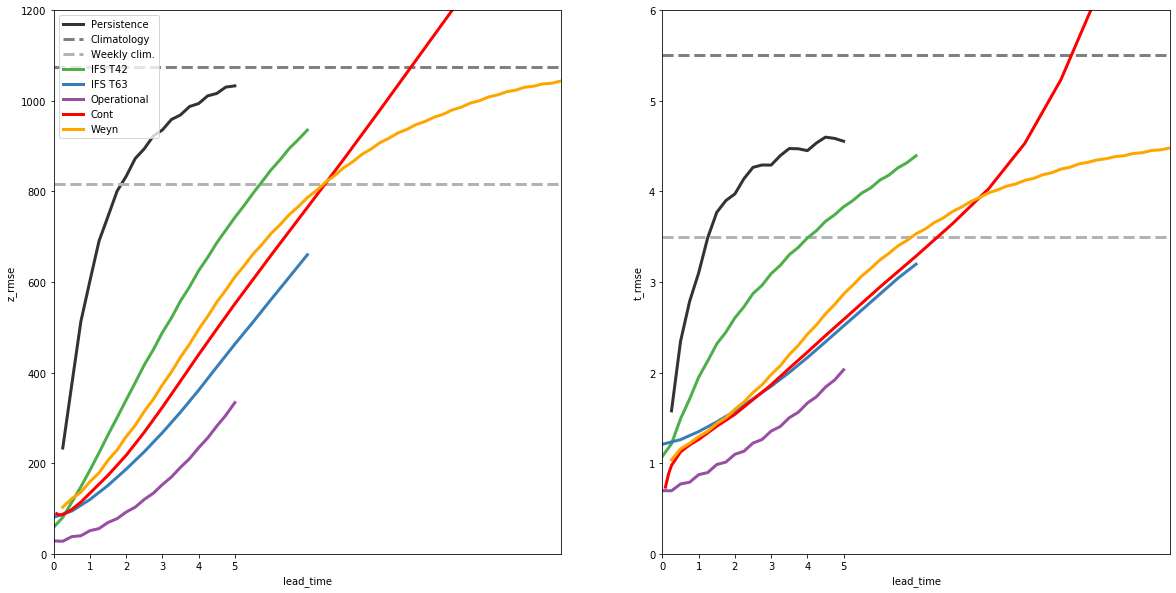

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_rmses(rmses, 'z', ax=ax1)
plot_rmses(rmses, 't', ax=ax2)
# ax1.plot(lead_times, [p.z_rmse for p in preds], lw=3, c='r', label='Rasp')
# ax2.plot(lead_times, [p.t_rmse for p in preds], lw=3, c='r')
scores.z_rmse.plot(ax=ax1, lw=3, c='r', label='Cont')
scores.t_rmse.plot(ax=ax2, lw=3, c='r')
rmse_weyn.z_rmse.plot(ax=ax1, lw=3, c='orange', label='Weyn')
rmse_weyn.t_rmse.plot(ax=ax2, lw=3, c='orange')
for ax in [ax1, ax2]: ax.set_xlim(0, 336)
ax1.legend(loc=2, ncol=1, fontsize=10)

## RMSE

In [14]:
args = load_args('../nn_configs/B/95-resnet_cont_rmse.yml')

In [15]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_rmse': tf.keras.losses.mse})

In [289]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [290]:
args['ext_mean'] = mean
args['ext_std'] = std

In [291]:
args['test_years'] = ['2017', '2017']

In [292]:
dg = load_data(**args, only_test=True)

DG start 10:02:45.205063
DG normalize 10:02:45.241472
DG load 10:02:45.250535
Loading data into RAM
DG done 10:02:49.626501


In [294]:
lead_time = np.concatenate([np.arange(2, 6, 2), np.arange(6, 24, 6), np.arange(24, 120, 12), np.arange(120, 336+1, 24)])

In [295]:
preds = create_cont_predictions(model, dg, lead_time=lead_time)

In [296]:
preds.to_netcdf('./preds_cont_rmse.nc')

In [297]:
preds

<xarray.Dataset>
Dimensions:    (lat: 32, lead_time: 23, lon: 64, time: 4377)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2017-01-01T04:00:00 ... 2017-12-31T20:00:00
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t          (lead_time, time, lat, lon) float64 257.4 257.5 257.6 ... nan nan
    z          (lead_time, time, lat, lon) float64 5.089e+04 5.092e+04 ... nan

In [298]:
scores = evaluate_iterative_forecast(preds, valid, compute_weighted_rmse).load(); scores

<xarray.Dataset>
Dimensions:    (lead_time: 23)
Coordinates:
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t_rmse     (lead_time) float64 0.931 1.05 1.167 1.384 ... 4.961 5.483 6.007
    z_rmse     (lead_time) float64 120.2 112.1 115.7 ... 1.087e+03 1.131e+03

In [299]:
scores.to_netcdf('./rmse_cont_rmse.nc')

In [301]:
dg[0][1].shape

(32, 32, 64, 2)

In [ ]:
t

## Check generalization error

In [35]:
args = load_args('../nn_configs/B/91-resnet_cont.yml')

In [36]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': tf.keras.losses.mse})

In [37]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [38]:
args['ext_mean'] = mean
args['ext_std'] = std

In [45]:
args['train_years'] = ['2014', '2014']

In [46]:
dg_train, dg_valid, dg_test = load_data(**args)

In [47]:
dg_train.shuffle = False
dg_train.on_epoch_end()

In [48]:
lead_time = np.concatenate([np.arange(2, 6, 2), np.arange(6, 24, 6), np.arange(24, 120, 12), np.arange(120, 336+1, 24)])

In [49]:
lead_time = np.concatenate([[6], np.arange(24, 121, 24)])

In [50]:
preds_train = create_cont_predictions(model, dg_train, lead_time=lead_time)

In [51]:
preds_valid = create_cont_predictions(model, dg_valid, lead_time=lead_time)

In [52]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z', years=slice('2014', '2018', None)).drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't', years=slice('2014', '2018', None)).drop('level')
valid = xr.merge([z500_valid, t850_valid])

In [53]:
scores_train = evaluate_iterative_forecast(preds_train, valid, compute_weighted_rmse).load()

In [54]:
scores_valid = evaluate_iterative_forecast(preds_valid, valid, compute_weighted_rmse).load()

In [60]:
exp_id = args['exp_id']

In [61]:
preds_train.to_netcdf(f'{args["pred_save_dir"]}/{exp_id}_train.nc')

In [62]:
preds_valid.to_netcdf(f'{args["pred_save_dir"]}/{exp_id}_valid.nc')

In [63]:
scores_train.to_netcdf('./rmse_cont_train.nc')

In [64]:
scores_valid.to_netcdf('./rmse_cont_valid.nc')

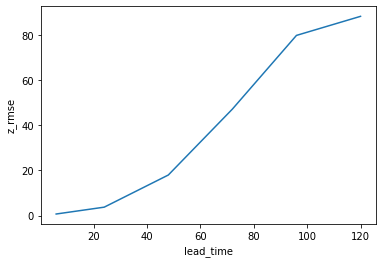

In [66]:
(scores_valid - scores_train).z_rmse.plot()

## Erm, did I do this wrong all along?

In [284]:
args = load_args('../nn_configs/B/81-resnet_d3_dr_0.1.yml')

In [285]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_rmse': tf.keras.losses.mse})

ValueError: Unknown loss function:lat_mse

In [ ]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [ ]:
args['ext_mean'] = mean
args['ext_std'] = std

In [ ]:
args['test_years'] = ['2017', '2017']

In [ ]:
args['data_subsample']

In [ ]:
dg = load_data(**args, only_test=True, test_data_subsample=2)

In [115]:
preds = create_predictions(model, dg)

In [116]:
compute_weighted_rmse(preds, valid).load()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t_rmse   float64 1.826
    z_rmse   float64 315.5

In [117]:
dg = load_data(**args, only_test=True, test_data_subsample=1)

DG start 10:21:43.098437
DG normalize 10:21:43.132543
DG load 10:21:43.143283
Loading data into RAM
DG done 10:21:50.287091


In [118]:
preds = create_predictions(model, dg)

In [119]:
compute_weighted_rmse(preds, valid).load()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t_rmse   float64 1.84
    z_rmse   float64 319.9

## Multi-dt training

In [40]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z').drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't').drop('level')
valid = xr.merge([z500_valid, t850_valid])

### Create non mulit reference model

In [29]:
args = load_args('../nn_configs/B/92-resnet_multi_dt.yml')

In [30]:
args['train_years'] = ['2014', '2015']
args['multi_dt'] = 1
args['lead_time'] = 6

In [32]:
dg_train, dg_valid, dg_test = load_data(**args)

In [33]:
X, y = dg_train[0]

In [34]:
len(X), len(y)

(32, 32)

In [35]:
X[0].shape, X[1].shape

((32, 64, 38), (32, 64, 38))

In [36]:
model_ref = build_resnet(
    [64, 64, 35], [7, 3, 3], input_shape=dg_train.shape,
    bn_position=args['bn_position'], use_bias=args['use_bias'], l2=args['l2'], skip=args['skip'],
    dropout=args['dropout'], activation=args['activation']
)

In [37]:
model_ref.compile('adam', 'mse')

In [39]:
model_ref.fit(dg_train, epochs=5, validation_data=dg_valid)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 274 steps, validate for 138 steps
Epoch 1/5
274/274 [==============================] - 17s 63ms/step - loss: 0.0816 - val_loss: 0.0746
Epoch 2/5
274/274 [==============================] - 17s 62ms/step - loss: 0.0802 - val_loss: 0.0744
Epoch 3/5
274/274 [==============================] - 17s 63ms/step - loss: 0.0794 - val_loss: 0.0726
Epoch 4/5
274/274 [==============================] - 17s 62ms/step - loss: 0.0786 - val_loss: 0.0743
Epoch 5/5
274/274 [==============================] - 17s 62ms/step - loss: 0.0777 - val_loss: 0.0709


In [42]:
preds = create_predictions(model_ref, dg_test)

In [43]:
compute_weighted_rmse(preds.z.sel(level=500), valid.z).load()

<xarray.DataArray 'z_rmse' ()>
array(187.15681142)
Coordinates:
    level    int64 500

### now train the continuous model

In [54]:
args = load_args('../nn_configs/B/92-resnet_multi_dt.yml')

In [55]:
args['train_years'] = ['2014', '2015']
args['multi_dt'] = 2
args['lead_time'] = 12

In [68]:
dg_train, dg_valid, dg_test = load_data(**args)

In [57]:
X, y = dg_train[0]

In [58]:
len(X), len(y)

(2, 2)

In [59]:
X[0].shape, X[1].shape

((32, 32, 64, 35), (32, 32, 64, 3))

In [60]:
model = build_resnet(
    [64, 64, 35], [7, 3, 3], input_shape=dg_train.shape,
    bn_position=args['bn_position'], use_bias=args['use_bias'], l2=args['l2'], skip=args['skip'],
    dropout=args['dropout'], activation=args['activation']
)

In [61]:
model = create_multi_dt_model(model, args['multi_dt'], dg_train)

In [62]:
model.compile('adam', 'mse')

In [63]:
model.fit(dg_train, epochs=15, validation_data=dg_valid)

Train for 274 steps, validate for 138 steps
Epoch 1/15
274/274 [==============================] - 40s 145ms/step - loss: 0.9395 - model_7_loss: 0.4352 - model_7_1_loss: 0.5022 - val_loss: 0.4080 - val_model_7_loss: 0.1579 - val_model_7_1_loss: 0.2480
Epoch 2/15
274/274 [==============================] - 37s 135ms/step - loss: 0.3603 - model_7_loss: 0.1520 - model_7_1_loss: 0.2063 - val_loss: 0.2910 - val_model_7_loss: 0.1129 - val_model_7_1_loss: 0.1761
Epoch 3/15
274/274 [==============================] - 36s 131ms/step - loss: 0.2777 - model_7_loss: 0.1130 - model_7_1_loss: 0.1627 - val_loss: 0.2448 - val_model_7_loss: 0.0965 - val_model_7_1_loss: 0.1464
Epoch 4/15
274/274 [==============================] - 37s 135ms/step - loss: 0.2517 - model_7_loss: 0.1013 - model_7_1_loss: 0.1484 - val_loss: 0.2297 - val_model_7_loss: 0.0900 - val_model_7_1_loss: 0.1377
Epoch 5/15
274/274 [==============================] - 36s 130ms/step - loss: 0.2382 - model_7_loss: 0.0954 - model_7_1_loss: 0.1

In [70]:
preds = create_predictions(model, dg_test, multi_dt=True)

In [71]:
compute_weighted_rmse(preds.z.sel(level=500), valid.z).load()

<xarray.DataArray 'z_rmse' ()>
array(182.2861689)
Coordinates:
    level    int64 500

### now the model

In [13]:
model = build_resnet(
    [64, 64, 35], [7, 3, 3], input_shape=dg_train.shape,
    bn_position=args['bn_position'], use_bias=args['use_bias'], l2=args['l2'], skip=args['skip'],
    dropout=args['dropout'], activation=args['activation']
)

In [14]:
model = create_multi_dt_model(model, args['multi_dt'], dg_train)

In [15]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 64, 35)] 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 64, 38)   0           input_4[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 32, 64, 35)   214051      concatenate[0][0]          

In [16]:
model.compile('adam', 'mse')

In [ ]:
model.fit(dg_train, epochs=5, validation_data=dg_valid)

Train for 274 steps, validate for 138 steps
Epoch 1/5
274/274 [==============================] - 39s 142ms/step - loss: 0.2302 - model_1_loss: 0.0921 - model_1_1_loss: 0.1360 - val_loss: 0.2111 - val_model_1_loss: 0.0829 - val_model_1_1_loss: 0.1263
Epoch 2/5
274/274 [==============================] - 38s 139ms/step - loss: 0.2233 - model_1_loss: 0.0892 - model_1_1_loss: 0.1320 - val_loss: 0.2076 - val_model_1_loss: 0.0811 - val_model_1_1_loss: 0.1245
Epoch 3/5
274/274 [==============================] - 38s 140ms/step - loss: 0.2180 - model_1_loss: 0.0871 - model_1_1_loss: 0.1290 - val_loss: 0.2050 - val_model_1_loss: 0.0797 - val_model_1_1_loss: 0.1233
Epoch 4/5
 55/274 [=====>........................] - ETA: 21s - loss: 0.2154 - model_1_loss: 0.0859 - model_1_1_loss: 0.1274

## Analyze multi-dt run

In [121]:
!ls /home/rasp/data/myWeatherBench/predictions/saved_models/92.1*

/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt.h5
/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt_history.pkl
/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt_mean.nc
/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt_std.nc
/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt_weights.h5


In [76]:
with open('/home/rasp/data/myWeatherBench/predictions/saved_models/92-resnet_multi_dt_history.pkl', 'rb') as f:
    h = pickle.load(f)

In [84]:
h.keys()

dict_keys(['loss', 'model_loss', 'model_1_loss', 'model_mse', 'model_1_mse', 'val_loss', 'val_model_loss', 'val_model_1_loss', 'val_model_mse', 'val_model_1_mse', 'lr'])

In [82]:
h['model_mse'][-1], h['model_1_mse'][-1]

(0.0310029, 0.04279188)

In [85]:
h['val_model_mse'][-1], h['val_model_1_mse'][-1]

(0.02870091, 0.044721734)

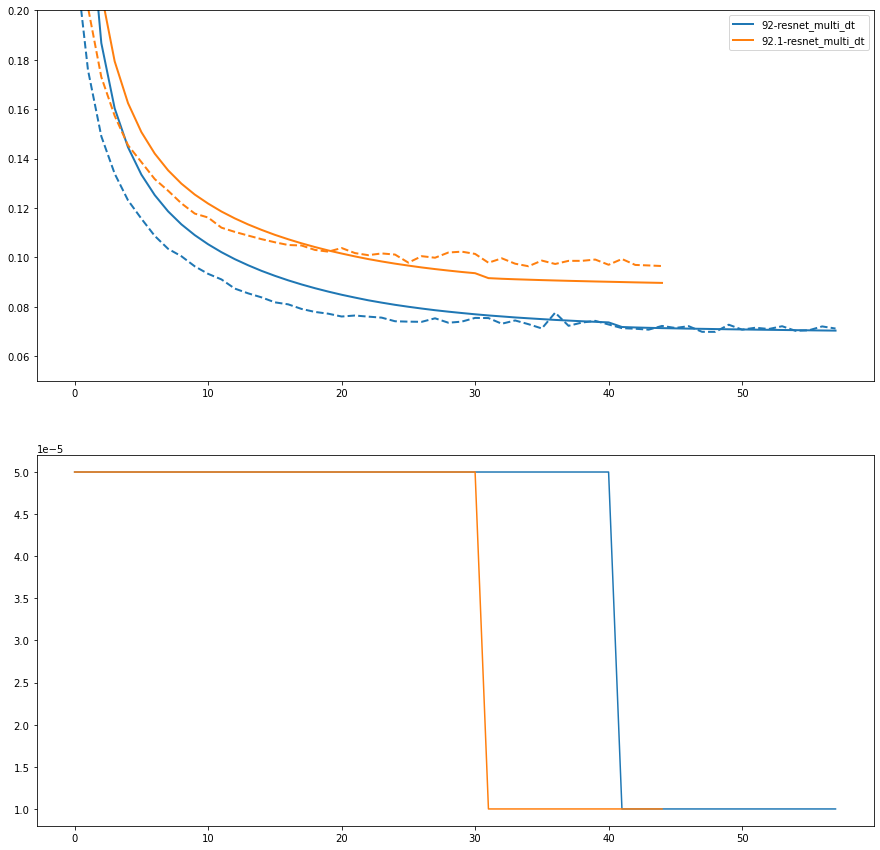

In [122]:
plot_losses('/home/rasp/data/myWeatherBench/predictions/saved_models/', 
            ['92', '92.1'], ylim=(0.05, 0.2)
        )

In [57]:
h = read_pickle('/home/rasp/data/myWeatherBench/predictions/saved_models/92.1-resnet_multi_dt_history.pkl')

In [58]:
h.keys()

dict_keys(['loss', 'model_loss', 'model_1_loss', 'val_loss', 'val_model_loss', 'val_model_1_loss', 'lr'])

(0.0, 0.1)

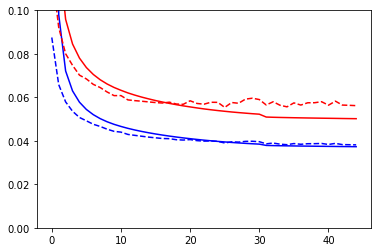

In [62]:
plt.plot(h['model_loss'], c='b')
plt.plot(h['val_model_loss'], c='b', ls='--')
plt.plot(h['model_1_loss'], c='r')
plt.plot(h['val_model_1_loss'], c='r', ls='--')
plt.ylim(0, 0.1)

In [63]:
args = load_args('../nn_configs/B/92-resnet_multi_dt.yml')

In [64]:
args['exp_id'] = '92.1-resnet_multi_dt'

In [65]:
args['train_years'] = ['2015', '2015']

In [66]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [68]:
args['ext_mean'] = mean
args['ext_std'] = std

In [70]:
dg_train, dg_valid, dg_test = load_data(**args)

In [90]:
dg_train.shuffle = False
dg_train.on_epoch_end()

In [99]:
lat_mse = create_lat_mse(valid.lat)

In [100]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': lat_mse})

In [101]:
np.min(h['val_loss'])

0.09645969447666321

In [102]:
model.evaluate(dg_train)

137/137 [==============================] - 16s 120ms/step - loss: 0.0923 - model_loss: 0.0366 - model_1_loss: 0.0531


[0.09225141692118052, 0.03656234, 0.053075727]

In [103]:
model.evaluate(dg_valid)

138/138 [==============================] - 13s 96ms/step - loss: 0.0965 - model_loss: 0.0382 - model_1_loss: 0.0556


[0.09645969447666321, 0.038219064, 0.05562728]

In [104]:
model.evaluate(dg_test)

274/274 [==============================] - 26s 94ms/step - loss: 0.0927 - model_loss: 0.0368 - model_1_loss: 0.0533


[0.09272490662053554, 0.036832727, 0.053278834]

In [171]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 64, 35)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 64, 38)   0           input_3[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
model (Model)                   (None, 32, 64, 35)   5906979     concatenate[0][0]          

In [172]:
preds = create_predictions(model, dg_test, multi_dt=True)

In [173]:
compute_weighted_rmse(preds.z.sel(level=500), valid.z).load()

<xarray.DataArray 'z_rmse' ()>
array(99.11375851)
Coordinates:
    level    int64 500

In [174]:
compute_weighted_rmse(preds.t.sel(level=850), valid.t).load()

<xarray.DataArray 't_rmse' ()>
array(1.08756775)
Coordinates:
    level    int64 850

#### directly predict 12 hours with net

In [83]:
def create_predictions_tmp(model, dg, multi_dt=False, parametric=False):
    """Create non-iterative predictions"""
    level_names = dg.data.isel(level=dg.output_idxs).level_names
    level = dg.data.isel(level=dg.output_idxs).level
    if parametric:
        # pdb.set_trace()
        lvl = level_names.values
        mm, ss = [], []
        for l in lvl:
            m = l.split('_'); s = l.split('_')
            m[0] += '-mean'; s[0] += '-std'
            mm.append('_'.join(m)); ss.append('_'.join(s))
        lvl = mm + ss
        level_names = xr.concat([level_names]*2, dim='level')
        level_names[:] = lvl
        level = xr.concat([level]*2, dim='level')

    preds = xr.DataArray(
        model.predict(dg)[1] if multi_dt else model.predict(dg),
        dims=['time', 'lat', 'lon', 'level'],
        coords={'time': dg.valid_time+np.timedelta64(6, 'h'), 'lat': dg.data.lat, 'lon': dg.data.lon,
                'level': level,
                'level_names': level_names
                },
    )
    # Unnormalize
    mean = dg.mean.isel(level=dg.output_idxs).values
    std = dg.std.isel(level=dg.output_idxs).values
    if parametric:
        mean = np.concatenate([mean, np.zeros_like(mean)])
        std = np.concatenate([std]*2)
    preds = preds * std + mean

    unique_vars = list(set([l.split('_')[0] for l in preds.level_names.values]))

    das = []
    for v in unique_vars:
        idxs = [i for i, vv in enumerate(preds.level_names.values) if vv.split('_')[0] in v]
        da = preds.isel(level=idxs).squeeze().drop('level_names')
        if not 'level' in da.dims: da = da.drop('level')
        das.append({v: da})
    return xr.merge(das)

In [84]:
preds12 = create_predictions_tmp(model, dg_test, multi_dt=True)

In [85]:
compute_weighted_rmse(preds12.z.sel(level=500), valid.z).load()

<xarray.DataArray 'z_rmse' ()>
array(166.25113603)
Coordinates:
    level    int64 500

In [86]:
compute_weighted_rmse(preds12.t.sel(level=850), valid.t).load()

<xarray.DataArray 't_rmse' ()>
array(1.38199385)
Coordinates:
    level    int64 850

In [91]:
preds12_train = create_predictions_tmp(model, dg_train, multi_dt=True)

In [92]:
compute_weighted_rmse(preds12_train.z.sel(level=500), valid.z).load()

<xarray.DataArray 'z_rmse' ()>
array(166.69934896)
Coordinates:
    level    int64 500

In [93]:
compute_weighted_rmse(preds12_train.t.sel(level=850), valid.t).load()

<xarray.DataArray 't_rmse' ()>
array(1.38314349)
Coordinates:
    level    int64 850

## Create iterative predictions

In [72]:
max_lead_time = 120

In [74]:
preds_it = create_iterative_precitions(model, dg_test, 120, sample=200)

In [78]:
preds_it_train = create_iterative_precitions(model, dg_train, 120, sample=200)

In [75]:
rmses = evaluate_iterative_forecast(preds_it.z.sel(level=500), z500_valid, compute_weighted_rmse).compute()

In [81]:
rmses_train = evaluate_iterative_forecast(preds_it_train.z.sel(level=500), z500_valid, compute_weighted_rmse).compute()

In [77]:
rmses

<xarray.DataArray 'z_rmse' (lead_time: 20)>
array([ 99.56854984, 164.44412816, 225.17177192, 281.43166445,
       335.6078622 , 387.33419107, 437.51975425, 486.33625531,
       533.96363245, 580.23507027, 625.04730328, 668.17879355,
       710.00844054, 750.3779852 , 789.34173095, 826.73848659,
       862.78271846, 897.45589474, 931.03790106, 963.52652673])
Coordinates:
    level      int64 500
  * lead_time  (lead_time) int64 6 12 18 24 30 36 42 ... 90 96 102 108 114 120

In [82]:
rmses_train

<xarray.DataArray 'z_rmse' (lead_time: 20)>
array([  97.97851521,  163.80106247,  225.65741057,  284.05638472,
        340.63098324,  395.3707797 ,  448.44074116,  500.26469778,
        550.60291128,  599.71202019,  647.27627524,  693.49256576,
        738.36186969,  782.13172233,  824.75976398,  865.97036855,
        905.43064979,  942.91569604,  978.4450929 , 1012.08444258])
Coordinates:
    level      int64 500
  * lead_time  (lead_time) int64 6 12 18 24 30 36 42 ... 90 96 102 108 114 120

In [225]:
rmse_weyn = xr.open_dataset('./weyn_rmse.nc').load()

In [226]:
rmse_weyn

<xarray.Dataset>
Dimensions:    (lead_time: 56)
Coordinates:
  * lead_time  (lead_time) float64 6.0 12.0 18.0 24.0 ... 324.0 330.0 336.0
Data variables:
    z_rmse     (lead_time) float64 103.2 122.1 136.1 ... 1.039e+03 1.044e+03
    t_rmse     (lead_time) float64 1.038 1.159 1.222 1.295 ... 4.453 4.46 4.48

In [106]:
xr.open_dataset('./rmse_cont.nc').load()

<xarray.Dataset>
Dimensions:    (lead_time: 23)
Coordinates:
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t_rmse     (lead_time) float64 0.7366 0.8798 0.9759 ... 6.167 7.278 8.572
    z_rmse     (lead_time) float64 88.74 85.62 86.75 ... 1.414e+03 1.521e+03

## Create iterative predictions

In [35]:
def create_iterative_precitions(model, dg, max_lead_time, multi_dt=False, sample=None):
    dt = dg.lead_time//dg.multi_dt
    lead_time = np.arange(dt, max_lead_time + dt, dt)
    state = dg.data[:dg.n_samples][:sample, ..., dg.not_const_idxs].values
    consts = dg.data[:dg.n_samples][:sample, ..., dg.const_idxs].values
    preds = []
    for i in tqdm(lead_time):
        if multi_dt:
            p = model.predict([state, consts], batch_size=dg.batch_size)[0]
        else:
            p = model.predict(np.concatenate([state, consts], axis=-1), batch_size=dg.batch_size)
        state = p
        p = p * dg.std.isel(level=dg.output_idxs).values + dg.mean.isel(level=dg.output_idxs).values
        preds.append(p)
    preds = np.array(preds)
    
    preds = xr.DataArray(
        preds,
        dims=['lead_time', 'time', 'lat', 'lon', 'level'],
        coords={'lead_time': lead_time, 'time': dg.init_time[:sample], 'lat': dg.data.lat, 'lon': dg.data.lon,
                'level': dg.data.isel(level=dg.output_idxs).level,
                'level_names': dg.data.isel(level=dg.output_idxs).level_names
                },
    )
    unique_vars = list(set([l.split('_')[0] for l in preds.level_names.values]))
    das = []
    for v in unique_vars:
        idxs = [i for i, vv in enumerate(preds.level_names.values) if vv.split('_')[0] in v]
        da = preds.isel(level=idxs).squeeze().drop('level_names')
        if not 'level' in da.dims: da = da.drop('level')
        das.append({v: da})
    return xr.merge(das)

In [14]:
args = load_args('../nn_configs/B/115-resnet_small_multi_dt.yml')
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")
args['ext_mean'] = mean
args['ext_std'] = std
dg_test = load_data(**args, only_test=True)
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': keras.losses.mse})

In [23]:
preds115 = create_iterative_precitions(model, dg_test, 24, multi_dt=True, sample=200)

In [26]:
evaluate_iterative_forecast(preds115.z.sel(level=500), z500_valid, compute_weighted_rmse).compute()

<xarray.DataArray 'z_rmse' (lead_time: 4)>
array([ 86.25447952, 131.4929319 , 174.52951078, 214.38135172])
Coordinates:
    level      int64 500
  * lead_time  (lead_time) int64 6 12 18 24

In [27]:
args = load_args('../nn_configs/B/114-resnet_small_6h_all_out.yml')
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")
args['ext_mean'] = mean
args['ext_std'] = std
dg_test = load_data(**args, only_test=True)
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': keras.losses.mse})

In [29]:
model.input

<tf.Tensor 'input_1_2:0' shape=(None, 32, 64, 38) dtype=float32>

In [31]:
dg_test[0][0].shape

(32, 32, 64, 38)

In [36]:
preds114 = create_iterative_precitions(model, dg_test, 24, multi_dt=False, sample=200)

In [37]:
evaluate_iterative_forecast(preds114.z.sel(level=500), z500_valid, compute_weighted_rmse).compute()

<xarray.DataArray 'z_rmse' (lead_time: 4)>
array([ 92.08719593, 151.14842715, 206.69799826, 259.06005596])
Coordinates:
    level      int64 500
  * lead_time  (lead_time) int64 6 12 18 24

In [38]:
args = load_args('../nn_configs/B/112-resnet_multi_dt_pre.yml')
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")
args['ext_mean'] = mean
args['ext_std'] = std
dg_test = load_data(**args, only_test=True)
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': keras.losses.mse})

In [39]:
preds112 = create_iterative_precitions(model, dg_test, 24, multi_dt=True, sample=200)

In [41]:
evaluate_iterative_forecast(preds112.z.sel(level=500), z500_valid, compute_weighted_rmse).compute()

<xarray.DataArray 'z_rmse' (lead_time: 4)>
array([104.90710635, 175.40364106, 238.71486332, 295.99065874])
Coordinates:
    level      int64 500
  * lead_time  (lead_time) int64 6 12 18 24

## Overfitting test

### Step 1 train direct models for 6, 12 h

In [6]:
args = load_args('../nn_configs/B/92-resnet_multi_dt.yml')

In [28]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z').drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't').drop('level')
valid = xr.merge([z500_valid, t850_valid])

In [15]:
args['filters'] = [128, 128, 128, 128, 128, 128, 128, 35]
args['kernels'] = [7, 3, 3, 3, 3, 3, 3, 3]
args['dropout'] = 0

In [7]:
args['exp_id'] = '92.1-resnet_multi_dt'

In [8]:
args['train_years'] = ['2015', '2015']

In [9]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [10]:
args['ext_mean'] = mean
args['ext_std'] = std

In [13]:
args['multi_dt'] = 1

#### 6h

In [14]:
args['lead_time'] = 6

In [16]:
dg_train, dg_valid, dg_test = load_data(**args)

In [17]:
model6 = build_resnet(
    **args, input_shape=dg_train.shape
)

In [18]:
loss = create_lat_mse(dg_train.data.lat)

In [21]:
opt = keras.optimizers.Adam(5e-5)

In [22]:
model6.compile(opt, loss)

In [24]:
model6.fit(dg_train, epochs=40, validation_data=dg_valid, validation_steps=20,
          validation_freq=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 137 steps, validate for 20 steps
Epoch 1/40
137/137 [==============================] - 18s 128ms/step - loss: 1.3494
Epoch 2/40
137/137 [==============================] - 13s 95ms/step - loss: 0.3094
Epoch 3/40
137/137 [==============================] - 15s 107ms/step - loss: 0.2420
Epoch 4/40
137/137 [==============================] - 17s 121ms/step - loss: 0.2093
Epoch 5/40
137/137 [==============================] - 33s 239ms/step - loss: 0.1894
Epoch 6/40
137/137 [==============================] - 37s 269ms/step - loss: 0.1750
Epoch 7/40
137/137 [==============================] - 26s 193ms/step - loss: 0.1643
Epoch 8/40
137/137 [==============================] - 9s 63ms/step - loss: 0.1558
Epoch 9/40
137/137 [==============================] - 9s 62ms/step - loss: 0.1489
Epoch 10/40
137/137 [==============================] - 10s 75ms/step - loss: 0.1430 - val_loss: 0.1571
Epoch 11/40
137/137 [==============================] 

In [26]:
preds = create_predictions(model6, dg_test)

In [29]:
compute_weighted_rmse(valid.z, preds.z.sel(level=500)).load()

<xarray.DataArray 'z_rmse' ()>
array(350.85304649)
Coordinates:
    level    int64 500

#### 12 h

In [31]:
args['lead_time'] = 12

In [32]:
dg_train, dg_valid, dg_test = load_data(**args)

In [33]:
model12 = build_resnet(
    **args, input_shape=dg_train.shape
)

In [34]:
loss = create_lat_mse(dg_train.data.lat)

In [35]:
opt = keras.optimizers.Adam(5e-5)

In [36]:
model12.compile(opt, loss)

In [37]:
model12.fit(dg_train, epochs=40, validation_data=dg_valid, validation_steps=20,
          validation_freq=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 137 steps, validate for 20 steps
Epoch 1/40
137/137 [==============================] - 14s 99ms/step - loss: 1.4389
Epoch 2/40
137/137 [==============================] - 8s 62ms/step - loss: 0.3399
Epoch 3/40
137/137 [==============================] - 9s 62ms/step - loss: 0.2732
Epoch 4/40
137/137 [==============================] - 9s 64ms/step - loss: 0.2413
Epoch 5/40
137/137 [==============================] - 9s 63ms/step - loss: 0.2221
Epoch 6/40
137/137 [==============================] - 9s 64ms/step - loss: 0.2085
Epoch 7/40
137/137 [==============================] - 9s 64ms/step - loss: 0.1983
Epoch 8/40
137/137 [==============================] - 9s 64ms/step - loss: 0.1906
Epoch 9/40
137/137 [==============================] - 9s 64ms/step - loss: 0.1839
Epoch 10/40
137/137 [==============================] - 10s 75ms/step - loss: 0.1786 - val_loss: 0.1965
Epoch 11/40
137/137 [==============================] - 9s 64ms/st

In [39]:
preds = create_predictions(model12, dg_test)

In [40]:
compute_weighted_rmse(valid.z, preds.z.sel(level=500)).load()

<xarray.DataArray 'z_rmse' ()>
array(374.85050434)
Coordinates:
    level    int64 500

### Multi dt model

In [42]:
args['lead_time'] = 12
args['multi_dt'] = 2

In [43]:
dg_train, dg_valid, dg_test = load_data(**args)

In [44]:
model_multi = build_resnet(
    **args, input_shape=dg_train.shape
)

In [47]:
model = create_multi_dt_model(model_multi, args['multi_dt'], dg_train)

In [48]:
loss = create_lat_mse(dg_train.data.lat)

In [49]:
opt = keras.optimizers.Adam(1e-5)

In [51]:
model.compile(opt, loss)

In [52]:
model.fit(dg_train, epochs=40, validation_data=dg_valid, validation_steps=20,
          validation_freq=10)

Train for 137 steps, validate for 20 steps
Epoch 1/40
137/137 [==============================] - 22s 162ms/step - loss: 11.0969 - model_3_loss: 5.1863 - model_3_1_loss: 5.8941
Epoch 2/40
137/137 [==============================] - 15s 109ms/step - loss: 2.0646 - model_3_loss: 1.0248 - model_3_1_loss: 1.0233
Epoch 3/40
137/137 [==============================] - 15s 106ms/step - loss: 1.1684 - model_3_loss: 0.5825 - model_3_1_loss: 0.5694
Epoch 4/40
137/137 [==============================] - 15s 109ms/step - loss: 0.9015 - model_3_loss: 0.4468 - model_3_1_loss: 0.4383
Epoch 5/40
137/137 [==============================] - 14s 105ms/step - loss: 0.7665 - model_3_loss: 0.3772 - model_3_1_loss: 0.3728
Epoch 6/40
137/137 [==============================] - 14s 105ms/step - loss: 0.6832 - model_3_loss: 0.3340 - model_3_1_loss: 0.3327
Epoch 7/40
137/137 [==============================] - 15s 106ms/step - loss: 0.6254 - model_3_loss: 0.3037 - model_3_1_loss: 0.3052
Epoch 8/40
137/137 [============

In [55]:
preds = create_predictions(model, dg_test, multi_dt=True)

In [56]:
compute_weighted_rmse(valid.z, preds.z.sel(level=500)).load()

<xarray.DataArray 'z_rmse' ()>
array(543.13034505)
Coordinates:
    level    int64 500